In [1]:

import contextily as ctx
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
base = "C:/Users/Alejandro/Desktop/Data/camda_relative.csv"
otus = pd.read_csv(base)
otus

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_4676\4006293161.py:15: DtypeWarning: Columns (3363,3878) have mixed types. Specify dtype option on import or set low_memory=False.
  otus = pd.read_csv(base)


,ID,ID_city,City,Latitude,Longitude,Climate,Year,468,469,28090,...,1146874,1519389,12480,1131,2886895,546184,12330,1922682,1513254,1922952
0,CAMDA23_MetaSUB_gCSD16_AKL_10,AKL,Auckland,-36.75,174.75,Cfb,2016,0.048249,10.696605,14.560432,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,CAMDA23_MetaSUB_gCSD16_AKL_11,AKL,Auckland,-36.75,174.75,Cfb,2016,0.038155,0.527739,0.041985,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,CAMDA23_MetaSUB_gCSD16_AKL_12,AKL,Auckland,-36.75,174.75,Cfb,2016,0.002185,0.234138,0.051282,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,CAMDA23_MetaSUB_gCSD16_AKL_13,AKL,Auckland,-36.75,174.75,Cfb,2016,0.000142,0.014304,0.010763,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,CAMDA23_MetaSUB_gCSD16_AKL_14,AKL,Auckland,-36.75,174.75,Cfb,2016,0.002103,0.061997,0.079509,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,CAMDA23_MetaSUB_gCSD17_ZRH_5,ZRH,Zurich,47.25,8.75,Cfb,2017,0.005680,0.120175,0.057822,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
282,CAMDA23_MetaSUB_gCSD17_ZRH_6,ZRH,Zurich,47.25,8.75,Cfb,2017,0.004338,0.293497,0.147385,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
283,CAMDA23_MetaSUB_gCSD17_ZRH_7,ZRH,Zurich,47.25,8.75,Cfb,2017,0.004828,0.345558,0.146226,...,0.000073,0.000073,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
284,CAMDA23_MetaSUB_gCSD17_ZRH_8,ZRH,Zurich,47.25,8.75,Cfb,2017,0.011375,0.585461,0.214900,...,0.000000,0.000000,0.000000,0.000028,0.000028,0.000028,0.000028,0.000028,0.000000,0.000000


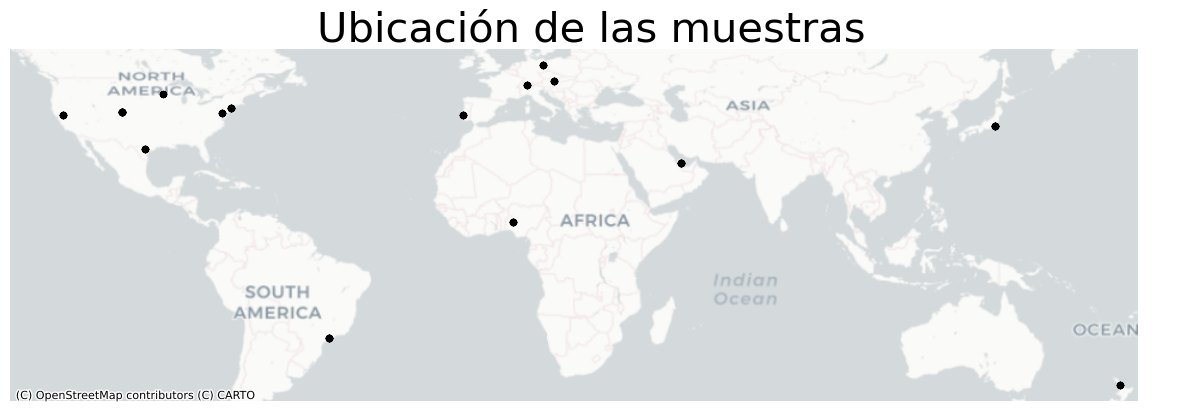

In [2]:

"Ubicación de las muestras"
otus_gdf = gpd.GeoDataFrame(otus.copy(), geometry=gpd.points_from_xy(otus['Longitude'], otus['Latitude']), crs='EPSG:4326')
fig, ax = plt.subplots(1, figsize=(15, 15))
otus_gdf.plot(marker='.', c='black', ax=ax, markersize=70, zorder=1)
plt.title("Ubicación de las muestras",fontsize=30)
plt.savefig('Mapa.png',format='png')
plt.axis("off")
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')



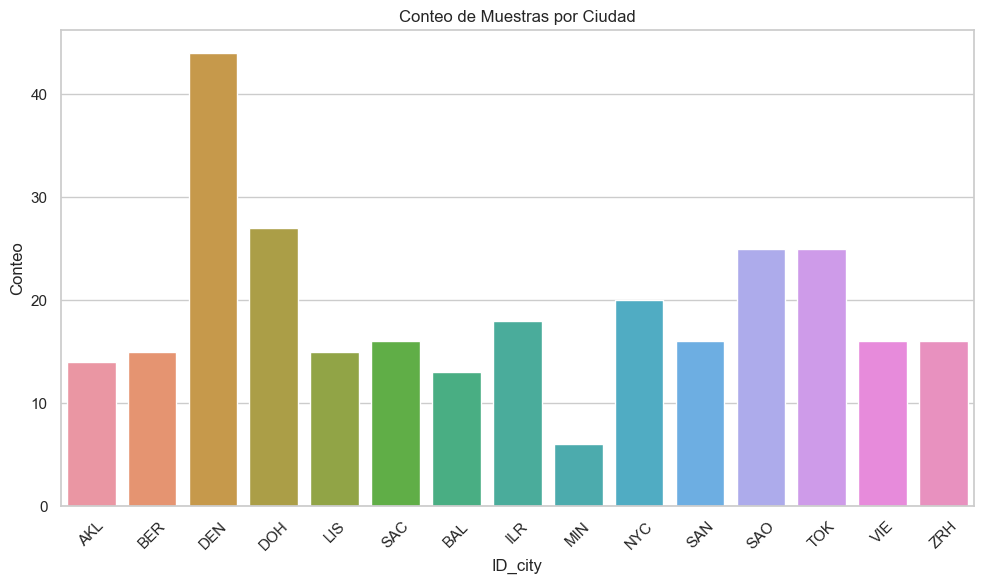

In [3]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=otus, x='ID_city')
plt.title('Conteo de Muestras por Ciudad')
plt.xlabel('ID_city')
plt.ylabel('Conteo')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.savefig('ConteoCiudad.png',format='png')
plt.show()

Accuracy: 0.5739130434782609


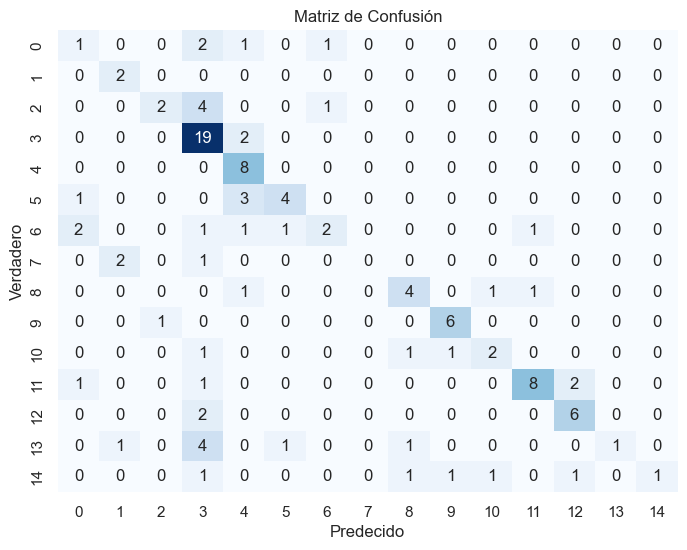

Classification Report:
               precision    recall  f1-score   support

         AKL       0.20      0.20      0.20         5
         BAL       0.40      1.00      0.57         2
         BER       0.67      0.29      0.40         7
         DEN       0.53      0.90      0.67        21
         DOH       0.50      1.00      0.67         8
         ILR       0.67      0.50      0.57         8
         LIS       0.50      0.25      0.33         8
         MIN       0.00      0.00      0.00         3
         NYC       0.57      0.57      0.57         7
         SAC       0.75      0.86      0.80         7
         SAN       0.50      0.40      0.44         5
         SAO       0.80      0.67      0.73        12
         TOK       0.67      0.75      0.71         8
         VIE       1.00      0.12      0.22         8
         ZRH       1.00      0.17      0.29         6

    accuracy                           0.57       115
   macro avg       0.58      0.51      0.48       115
we

C:\Users\Alejandro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alejandro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alejandro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
"Preproceso de los datos"
data=otus
"Las primera 7 columnas no possen características"
numerical_columns = data.iloc[:, 7:].select_dtypes(include=['int','float']).columns
"seleccionamos únicamente las columnas con datos númericos"
features = data[numerical_columns]
"transformación de los datos"
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
"Componenttes Principales"
pca = PCA(n_components=250)  
reduced_features = pca.fit_transform(scaled_features)
"Clasificación de los datos"
target = data['ID_city']
"Separamos en datos de entrenamiento y prueba"
X_train,X_test,y_train,y_test = train_test_split(reduced_features,target,test_size=0.4,random_state=42)


"Método de clasificación: Random Forest"
clf = RandomForestClassifier(n_estimators=200, random_state=42)


"Entrenamiento"
clf.fit(X_train, y_train)

"Predicción"

y_pred = clf.predict(X_test)

"Evalución de la clasificación"
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

"Matriz de confusión"
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Predecido")
plt.ylabel("Verdadero")
plt.savefig('MCciudades.png',format='png')
plt.show()

"Reporte de clasificación"
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)